In [2]:
# Import the modules
import pandas as pd
from sklearn.cluster import KMeans

In [3]:
# Read in the CSV file as a pandas DataFrame and make the "year" column the index.
used_df = pd.read_csv("./Resources/used-car-sales-data.csv", index_col="year")

# Review the DataFrame
used_df.head()

,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage
year,,,,,,,
2017,440000,45000,1,1,1,1,20.14
2016,400000,40000,1,1,1,1,18.15
2016,778000,70000,2,1,1,2,24.52
2016,680000,100000,2,1,1,1,22.54
2017,950000,50000,2,1,1,1,25.50


In [4]:
# Create a a list to store inertia values
inertia = []

# Create a a list to store the values of k
k = list(range(1,11))

# [-100, 14, 14, 5, 40, 2, 6]

# Create a for-loop where each value of k is evaluated using the K-means algorithm
# Fit the model using the spread_df DataFrame
# Append the value of the computed inertia from the `inertia_` attribute of the K-means model instance
for i in k:
    k_model = KMeans(n_clusters=i, n_init='auto', random_state=2)
    k_model.fit(used_df)
    inertia.append(k_model.inertia_)

In [5]:
# Create a dictionary that holds the list values for k and inertia
elbow_data = {"k" : k, "inertia" : inertia}

# Create a DataFrame using the elbow_datadictionary
df_elbow = pd.DataFrame(elbow_data)

# Review the DataFrame
df_elbow.head()

,k,inertia
0,1,4.087386e+15
1,2,8.901155e+14
2,3,4.300803e+14
3,4,2.472239e+14
4,5,1.776947e+14


<Axes: title={'center': 'Elbow Curve'}, xlabel='k'>

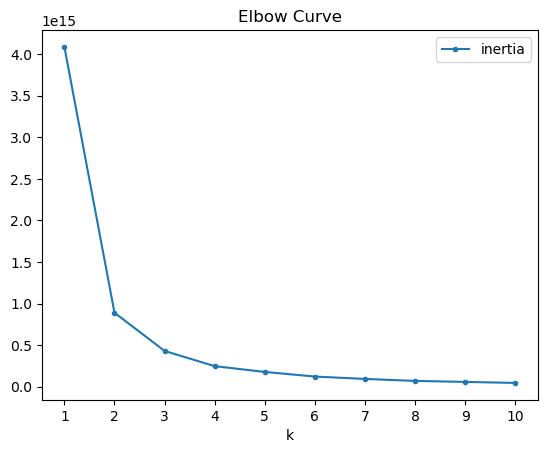

In [7]:
# Plot the elbow curve
df_elbow.plot(kind='line', x='k', 
              y='inertia', title="Elbow Curve", 
              style=".-",
              xticks=k)